In [1]:
import os
import pathlib

import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()
del mnist

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2)
x_train = (X_train.reshape(-1, 1,784) / 255).astype(np.float32)
x_val = (X_val.reshape(-1, 1,784) / 255).astype(np.float32)
x_test = (X_test.reshape(-1, 1,784) / 255).astype(np.float32)
y_test = Y_test

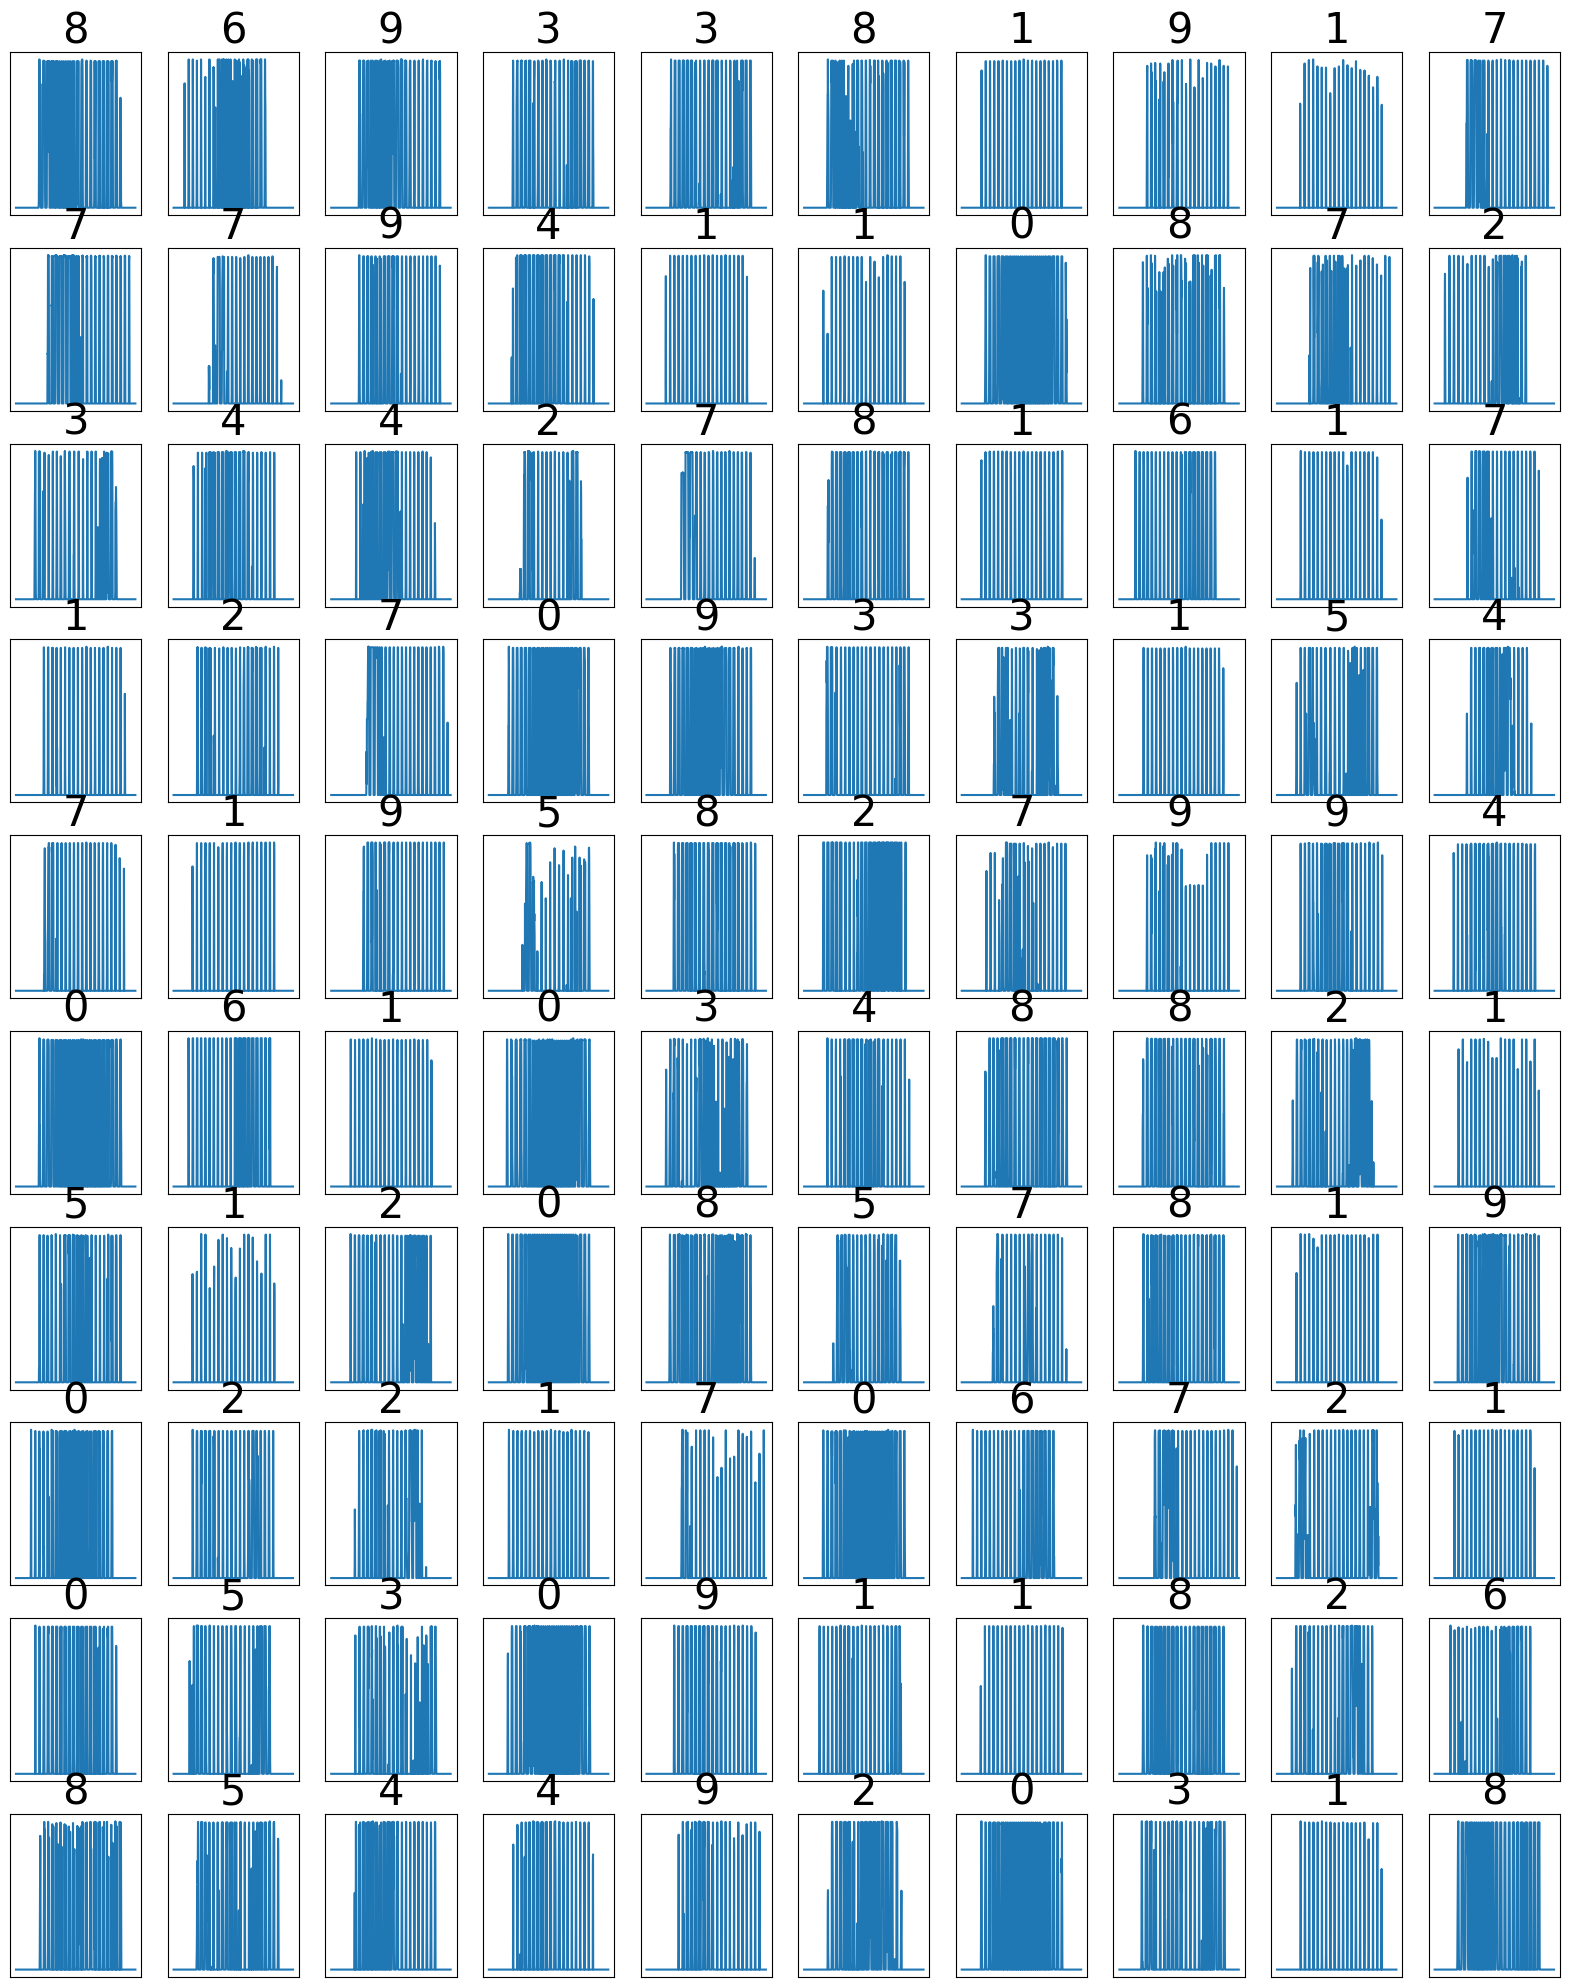

In [4]:
fig, ax = plt.subplots(10, 10,figsize=(20, 25))
for i in range(0,100):
    r = i // 10
    c = i %  10
    ax[r,c].set_xticks([])
    ax[r,c].set_yticks([])
    ax[r,c].set_title(y_train[i],fontsize=30)
    ax[r,c].plot(range(len(x_train[i][0])), x_train[i][0])
plt.show()

# 演習内容
10種類の特徴のあるデータがあります。すでに、データは次のように分割をしました。時系列データのニューラルネットワークを構築して、検証データ(入力)から結果を予測し、検証データ(結果)と一致するか、確認をしてみましょう。

|変数名| データの用途|
| -- | -- |
|x_train|教師データ 学習用(入力)|
| Y_train | 教師データ 学習用(結果) |
|x_val|教師データ 評価用(入力)|
| Y_val | 教師データ 評価用(結果) |
|x_test|検証データ(入力)|
| Y_test | 検証データ(結果) |



In [5]:


np.random.seed(123)
tf.random.set_seed(123)

In [6]:
# Model
model = Sequential()
model.add(SimpleRNN(100, activation='tanh',
               kernel_initializer='glorot_normal',               
               recurrent_initializer='orthogonal'))
model.add(Dense(10, activation='softmax'))
optimizer = optimizers.Adam(learning_rate=0.001,
                                beta_1=0.9, beta_2=0.999, amsgrad=True)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=["accuracy"]
             )

In [7]:
#6.学習
es = EarlyStopping(monitor='val_loss',
                       patience=10,
                       mode="auto")
hist = model.fit(x_train, y_train,
                 epochs=1000, batch_size=100,
                 verbose=2,
                 validation_data=(x_val, y_val),
                 callbacks=[es]
                )

Epoch 1/1000
480/480 - 3s - loss: 0.4021 - accuracy: 0.8879 - val_loss: 0.2483 - val_accuracy: 0.9295 - 3s/epoch - 6ms/step
Epoch 2/1000
480/480 - 2s - loss: 0.2154 - accuracy: 0.9387 - val_loss: 0.1865 - val_accuracy: 0.9465 - 2s/epoch - 4ms/step
Epoch 3/1000
480/480 - 1s - loss: 0.1618 - accuracy: 0.9544 - val_loss: 0.1510 - val_accuracy: 0.9561 - 970ms/epoch - 2ms/step
Epoch 4/1000
480/480 - 2s - loss: 0.1302 - accuracy: 0.9628 - val_loss: 0.1303 - val_accuracy: 0.9622 - 2s/epoch - 3ms/step
Epoch 5/1000
480/480 - 2s - loss: 0.1068 - accuracy: 0.9695 - val_loss: 0.1163 - val_accuracy: 0.9656 - 2s/epoch - 3ms/step
Epoch 6/1000
480/480 - 2s - loss: 0.0883 - accuracy: 0.9760 - val_loss: 0.1096 - val_accuracy: 0.9692 - 2s/epoch - 4ms/step
Epoch 7/1000
480/480 - 1s - loss: 0.0758 - accuracy: 0.9796 - val_loss: 0.1019 - val_accuracy: 0.9697 - 1s/epoch - 3ms/step
Epoch 8/1000
480/480 - 1s - loss: 0.0651 - accuracy: 0.9822 - val_loss: 0.0985 - val_accuracy: 0.9720 - 1s/epoch - 3ms/step
Epoch

In [8]:
z = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [9]:
z[0]

array([7.3495872e-09, 9.0517793e-12, 1.8079156e-07, 3.1457505e-05,
       8.9783452e-11, 9.2036014e-09, 7.2552614e-14, 9.9996829e-01,
       3.0878535e-08, 5.4211714e-08], dtype=float32)

In [10]:
np.argmax(z[1])

2

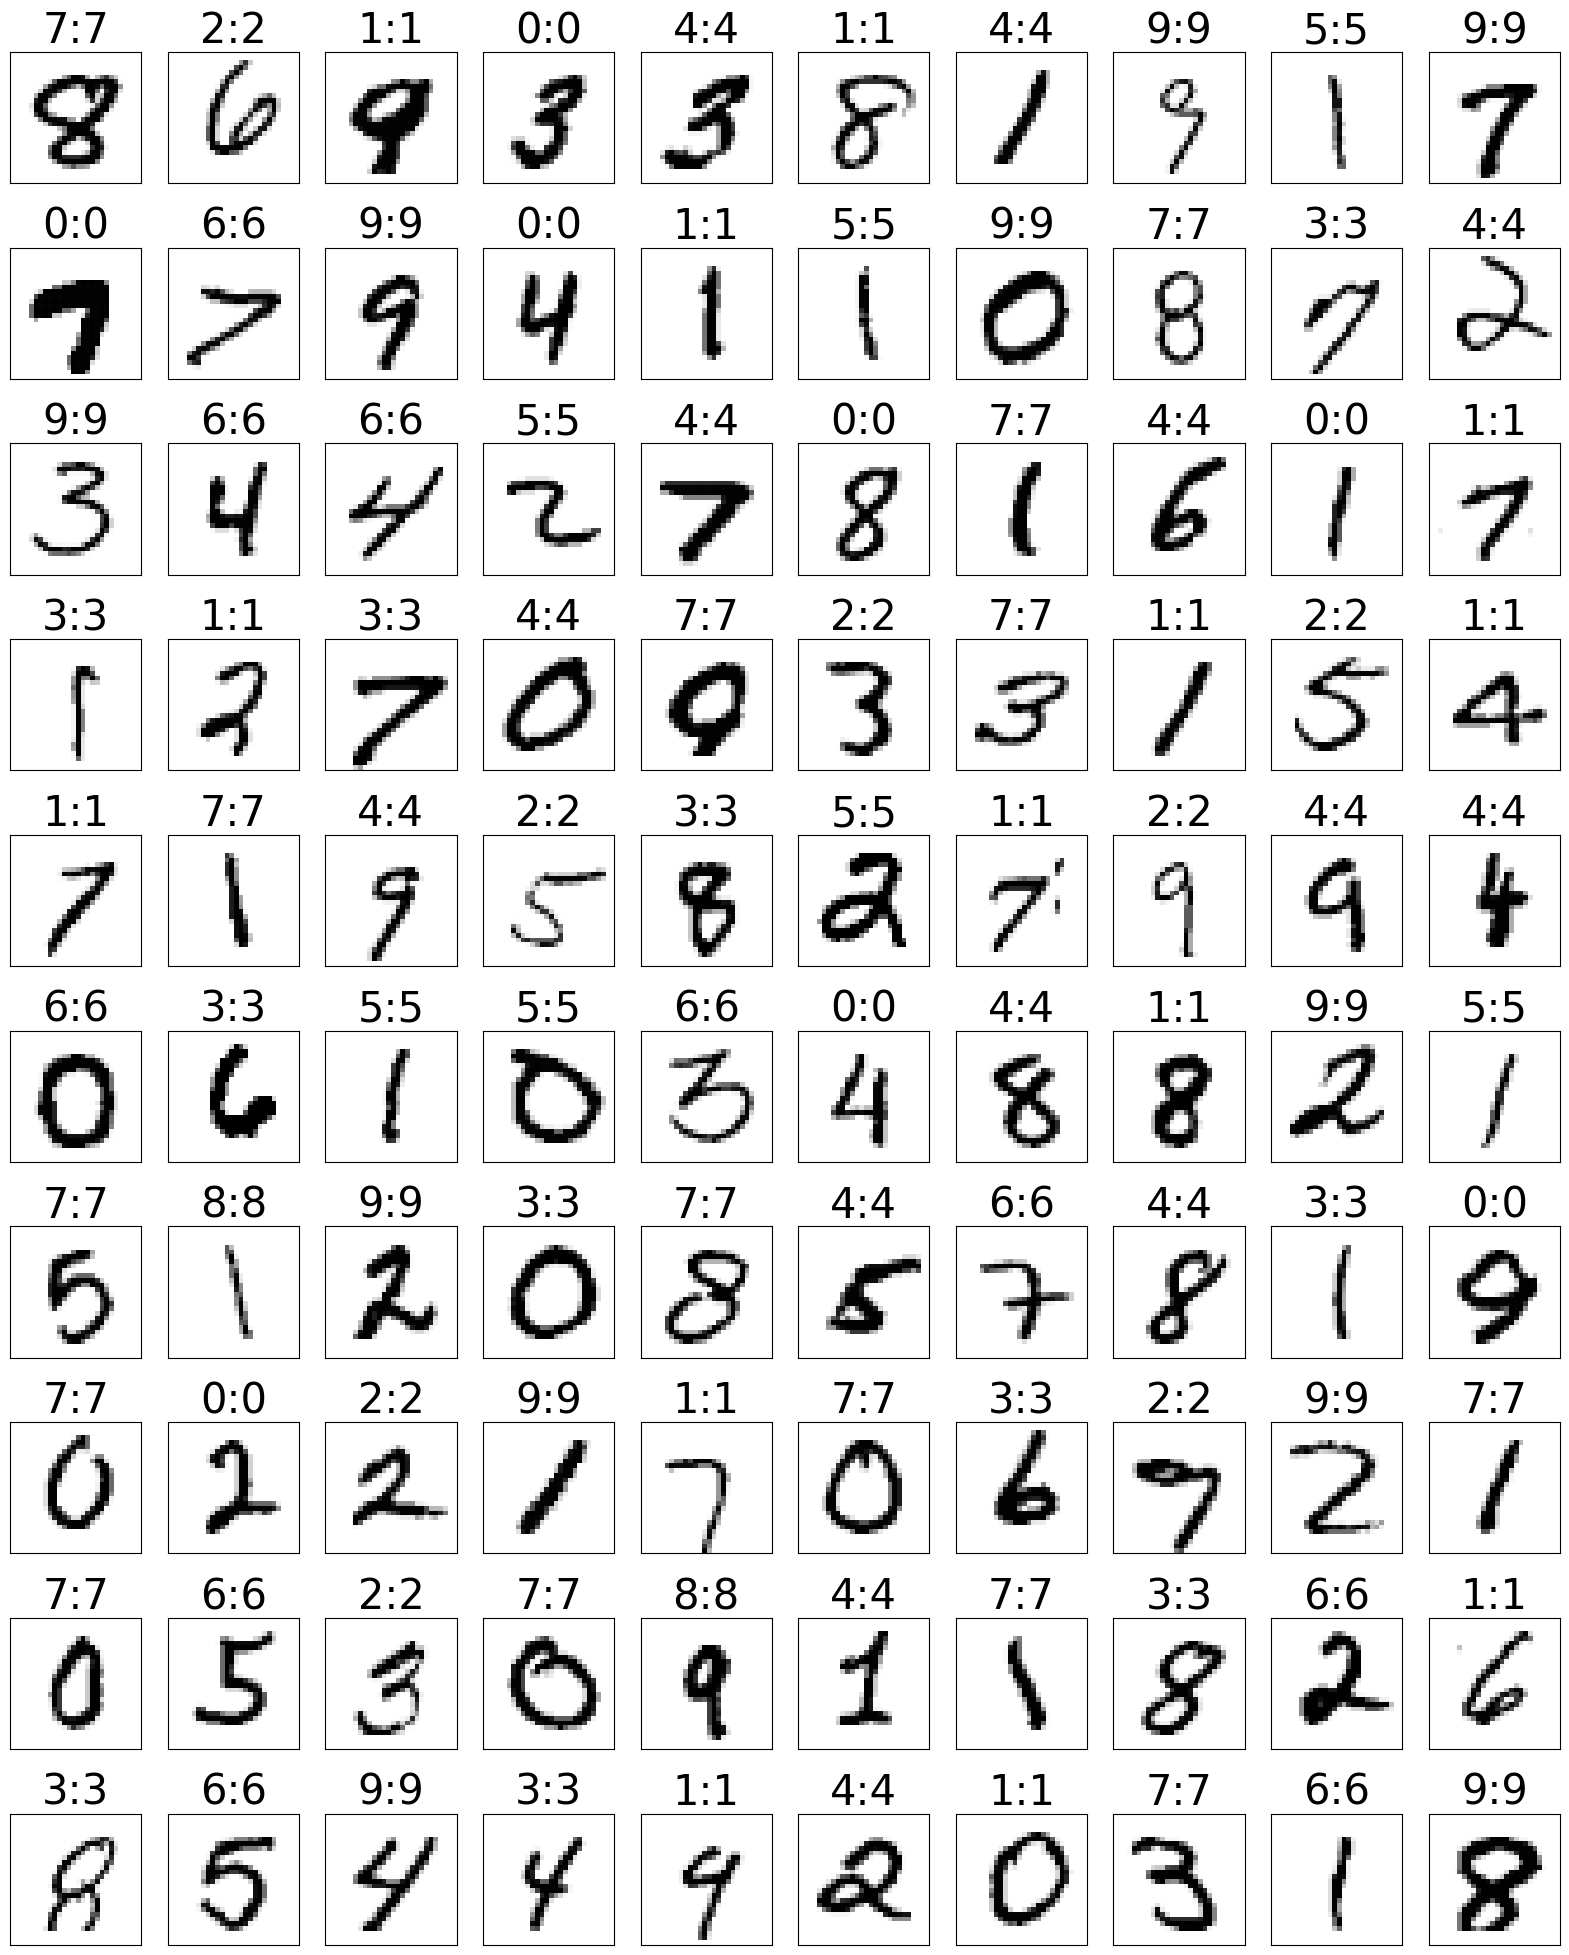

In [12]:
fig, ax = plt.subplots(10, 10,figsize=(20, 25))
for i in range(0,100):
    r = i // 10
    c = i %  10
    ax[r,c].set_xticks([])
    ax[r,c].set_yticks([])
    #ax[r,c].set_title(y_train[i],fontsize=30)
    ax[r,c].set_title(str(y_test[i])+":"+str(np.argmax(z[i])),fontsize=30)
    ax[r,c].imshow(X_train[i], cmap='Greys')
plt.show()